# Feb_21_22 Online shopping_customer valuation

## Online shopping Customer Segmentation

**Problem statement**
-  # calculate the customer  Value
-  1: Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary) 
-  2: Segment (Group/Cluster) Identify trends for Day, Month, Season, Time by Invoice count
-  3.Top 10 selling product 
-  4 Best product at country level.
-  5 FINDING CUSTOMER VALUATION.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Importing dataset

In [2]:
data = pd.read_excel('notebook\datasets\Online_shopping.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'notebook\\datasets\\Online_shopping.csv'

In [ ]:
df=data.copy()
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df["Country"].value_counts(normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

In [ ]:
df["Country"].head(10)

0    United Kingdom
1    United Kingdom
2    United Kingdom
3    United Kingdom
4    United Kingdom
5    United Kingdom
6    United Kingdom
7    United Kingdom
8    United Kingdom
9    United Kingdom
Name: Country, dtype: object

<AxesSubplot:xlabel='Country', ylabel='count'>

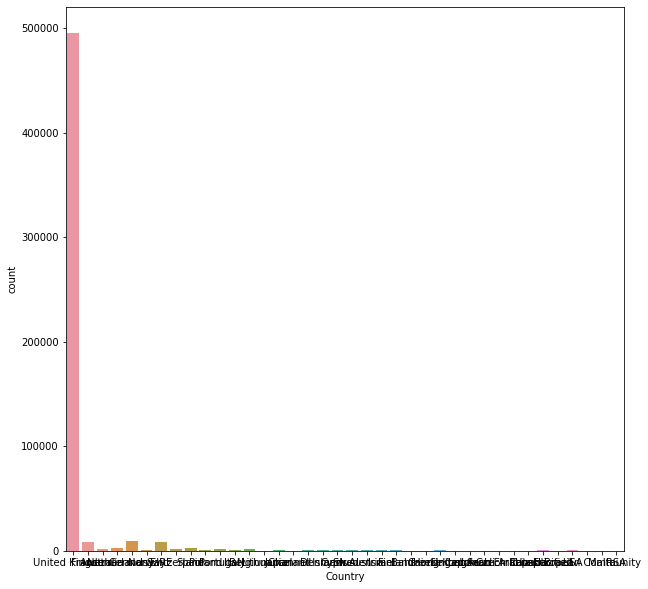

In [ ]:
#Cn_sale= df4.groupby(['Country']).agg(Sum_of_Sales=('Total','sum')).reset_index().sort_values(by = 'Sum_of_Sales', ascending = False)

plt.figure(figsize=(10,10))
#fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(data=df, x="Country")

In [ ]:
# The above information show that we have maximum no. of business coming from the U.K 

## Data Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


- Total 8 feature and this one is clustering problem so no target variable column is there...Data set consists of 541909 rows
- InvoiceDate column is already in datetime format
- Has null values in few features as well

- 'Stockcode','Description','Country','lower' has no significance in customer segmentation so lets drop those

In [ ]:
# Droping columns are insignificant for customer segmentation
df1 = df.drop(['StockCode','Description', 'Country','lower'], axis = 1)
df1.head(2)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0


## Missing value / Null value Analysis

In [ ]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

- There are null values in Customer ID
- CustomerID brings important information which cannot be retrive once missing and its unique also so imputation is not meaningful
- Once they are missing, the transaction information will be worthless but the feature is important for ssegmentation
- So lets drop those null rows instead of filling or dropping whole feature

In [ ]:
# Droping missing value in the CustomerID
df1.dropna(axis = 0, how = 'any',inplace=True)

- **Checking 5 point summary of features**

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [ ]:
#From descriptive statistics we can see that some of the order in a 
#negative quantity. That is practically not possible.

- There is a negative value in minimum Quantity

- It occurs when customer returns the product(defective)


- Also observed the Minimum unit price is 0 so may be some free items included in  invoice

In [ ]:
## finding the rows having unit price as 0
df1[df1["UnitPrice"]==0]["UnitPrice"].count()

40

In [ ]:
df1[df1["UnitPrice"]==0].head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0


- For total Sale we have to multiply 'Quantity' with 'UnitPrice'
- There is two ways we can handel negative quantity entries
   - 1- So we can replace the negative quanity by 0 also so that total sale amount will be 0 for that entry
   - 2- We can leave the negative qty like that only so that total sale will -ve and it will cancel out the +ve sale of that item to balance out

 #### But at least customer came and buy something so we can give imporatance to that sale amount so lets fill -ve qty by 0

In [ ]:
df1=df1[(df1["Quantity"]>0)]

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00


In [ ]:
#df1["Quantity"]=np.where(df1["Quantity"]<0,0,df1["Quantity"])

- **Creating another column by calculating Total Sale (Sale= Qty x UnitPrice)**

In [ ]:
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


### Now we can drop 'Quantity','UnitPrice' feature as well so lets drop and create another data set

In [ ]:
df2=df1.drop(["Quantity","UnitPrice"],axis=1)
df2.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


- For every item there is differnet entry for same invoice number so to get total sale we have to add total of same invoice
- We can apply gropuby and sum function to get total sale of an Invoice 

In [ ]:
#df_ = df2.groupby(['CustomerID','InvoiceNo','InvoiceDate']).agg({ 'Total': 'sum'}).reset_index()

In [ ]:
df_final = df2.groupby(['InvoiceNo','InvoiceDate','CustomerID']).agg({ 'Total': 'sum'}).reset_index()

In [ ]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


### Final Dataset

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18566 entries, 0 to 18565
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18566 non-null  int64         
 1   InvoiceDate  18566 non-null  datetime64[ns]
 2   CustomerID   18566 non-null  float64       
 3   Total        18566 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 580.3 KB


## Goal-1: Performing customer segmentation from this dataset

**Customer Classification on basis of Recency, Frequency, Monetary**
- 1.Recency-  How recently visited
- 2.Frequency-Total how many times visited
- 3.Monetary- Total amount spend in visit

In [ ]:
# check the latest date or last date of dataset
max(df_final["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [ ]:
# check the starting date of dataset
min(df_final["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

- From start date and last date we can conclude that this is datset for 1 year (Dec 2010 to Dec 2011)

**Set the last date as benchmark and create a latest date by adding +1 day**

In [ ]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

# By keeping reference as customer id

### 1.Recency-   Difference between last invoice date and the latest date- From 'InvoiceDate' column
### 2.Frequency- Counts of invoice no. - From 'InvoiceNo' column
### 3.Monetary-  Sum of total.- From 'Total' column


In [ ]:
"""# Now we shall compute
(a)Recency:-the number of days between the present date 
and the date of last purchase from each customer.
(b)Frequency:-the number of order for each customer
(c)Monetary:-the sum of purchase price for each customer.
"""

In [ ]:
RFMScore=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                            "InvoiceNo":lambda x:x.count(),
                                            "Total":lambda x:x.sum()}).reset_index()
RFMScore.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


- **Rename the column as Recency,Frequency,Monetary**

In [ ]:
RFMScore=RFMScore.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


#### Now we have to set benchmark for R,F,M to assign scores so that segmentation can be done as per total score

#### The benchmark can be based on percentile so lets see the five point summary of RFM score data

In [ ]:
RFMScore.describe()

,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.041484,4.278866,2053.793018
std,1721.889758,100.007757,7.727621,8988.248381
min,12346.000000,0.000000,1.000000,0.000000
25%,13812.500000,17.000000,1.000000,307.245000
50%,15299.000000,50.000000,2.000000,674.450000
75%,16778.500000,141.500000,5.000000,1661.640000
max,18287.000000,373.000000,211.000000,280206.020000


## Recency 

**ECDF plot - Emperical cumulative distribution function which plots count of observation w.r.t feature**

<AxesSubplot:xlabel='Recency', ylabel='Proportion'>

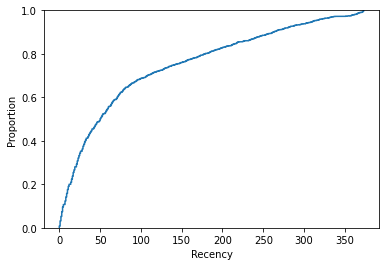

In [ ]:
import seaborn as sns
sns.ecdfplot(data=RFMScore["Recency"])

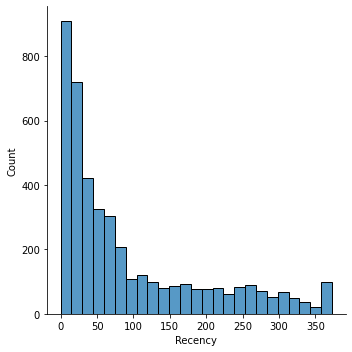

In [ ]:
sns.displot(x=RFMScore["Recency"])

- Making 4 slots as if any customer visited within last 1 month,last 2 month, last 4 month or more 

In [ ]:
## taking percentile as 39,56,72 to divide
RFMScore["Recency"].quantile(q=[0.39,0.56,0.72])

0.39     31.00
0.56     63.00
0.72    120.36
Name: Recency, dtype: float64

## Frequency

<AxesSubplot:xlabel='Frequency', ylabel='Proportion'>

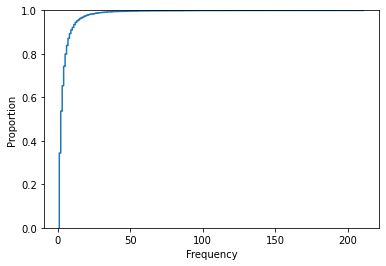

In [ ]:
sns.ecdfplot(data=RFMScore["Frequency"])

In [ ]:
min(RFMScore["Frequency"])

1

In [ ]:
max(RFMScore["Frequency"])

211

- Making 5 slots as if any customer visited more than 50 times,more than 25,more than 15 times or more than 5 times or less than that

In [ ]:
RFMScore["Frequency"].quantile(q=[0.20,0.4,0.6,0.8])

0.2    1.0
0.4    2.0
0.6    3.0
0.8    6.0
Name: Frequency, dtype: float64

In [ ]:
RFMScore["Frequency"].quantile(q=[0.75,0.94,0.977,0.995])

0.750     5.00
0.940    12.00
0.977    20.00
0.995    41.93
Name: Frequency, dtype: float64

## Monetary

<AxesSubplot:xlabel='Monetary', ylabel='Proportion'>

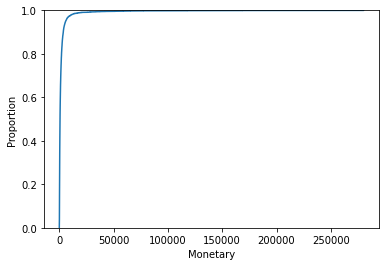

In [ ]:
sns.ecdfplot(data=RFMScore["Monetary"])

- Making 5 slots as if any customer spent less than 1000, less than 2000, less than 5000, less than 20000,less than 100000 or more

In [ ]:
RFMScore["Monetary"].quantile(q=[0.62,0.80,0.938,0.9915,0.9985])

0.6200      1013.16320
0.8000      2057.91400
0.9380      5059.56728
0.9915     26059.66428
0.9985    104036.78425
Name: Monetary, dtype: float64

In [ ]:
quantile100=RFMScore.quantile(q=[0.39,0.56,0.72])#Recency
quantile200=RFMScore.quantile(q=[0.75,0.94,0.977,0.995])#Frequency
quantile300=RFMScore.quantile(q=[0.62,0.80,0.938,0.9915,0.9985])#Monetary

## Function for R,F,M scoring

In [ ]:

def RScoring(x,d,p):
    if x<=d[p][0.39]:
        return 4
    elif x<=d[p][0.56]:
        return 3
    elif x<=d[p][0.72]:
        return 2
    else:
        return 1
    

In [ ]:
def FScoring(x,p,d):
    if x<=d[p][0.75]:
        return 1
    elif x<=d[p][0.94]:
        return 2
    elif x<=d[p][0.977]:
        return 3
    elif x<=d[p][0.995]:
        return 4
    else:
        return 5
    

In [ ]:
def MScoring(x,p,d):
    if x<=d[p][0.62]:
        return 1
    elif x<=d[p][0.80]:
        return 2
    elif x<=d[p][0.938]:
        return 3
    elif x<=d[p][0.9915]:
        return 4
    else:
        return 5
 

## Calculating RFM score of each customer by applying respective score function 

In [ ]:
RFMScore["R"]=RFMScore["Recency"].apply(RScoring,args=(quantile100,"Recency"))   
RFMScore["F"]=RFMScore["Frequency"].apply(FScoring,args=("Frequency" ,quantile200))
RFMScore["M"]=RFMScore["Monetary"].apply(MScoring,args=("Monetary" ,quantile300))

**Function arguments**
- x-RFMScore["Recency"]
- p-"Frequency"
- d=quantile200

In [ ]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,1,1,5
1,12347.0,2,7,4310.00,4,2,3
2,12348.0,75,4,1797.24,2,1,2
3,12349.0,18,1,1757.55,4,1,2
4,12350.0,310,1,334.40,1,1,1


### Finding sum of R,F,M Score 

In [ ]:
RFMScore["RFM_sum"]=RFMScore[["R","F","M"]].sum(axis=1)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum
0,12346.0,325,1,77183.60,1,1,5,7
1,12347.0,2,7,4310.00,4,2,3,9
2,12348.0,75,4,1797.24,2,1,2,5
3,12349.0,18,1,1757.55,4,1,2,7
4,12350.0,310,1,334.40,1,1,1,3


In [ ]:
RFMScore.RFM_sum.value_counts()

3     1056
6      888
5      613
4      557
7      379
8      284
9      276
10     117
11      80
12      59
14      17
13      13
Name: RFM_sum, dtype: int64

## Doing segmentation by assigning loyality type to each customer

In [ ]:
loyality_label=["Silver","Gold","Diamond","Platinum"]  # 0-4 silver, 5-6 Gold, 7-10 Diamond, 10+ Platinum

In [ ]:
RFMScore["RFM_sum"].quantile(q=[0.25,0.70,0.95])

0.25     4.0
0.70     6.0
0.95    10.0
Name: RFM_sum, dtype: float64

In [ ]:
quantile500=RFMScore["RFM_sum"].quantile(q=[0.25,0.70,0.95])

In [ ]:
def loyality(x,d,p):
    if x<=4:
        return 'Silver'
    elif x<=6:
        return 'Gold'
    elif x<=10:
        return 'Diamond'
    else:
        return 'Platinum'

In [ ]:
RFMScore["RFM_loyality"]=RFMScore["RFM_sum"].apply(loyality,args=(quantile500,"RFM_sum")) 

In [ ]:
# can apply qcut function to divide into 4 equal parts
# score_cuts=pd.qcut(RFMScore.RFM_sum,q=4,labels=loyality_label)
# RFMScore["RFM_loyality"]=score_cuts.values

In [ ]:
RFMScore["RFM_loyality"].value_counts()

Silver      1613
Gold        1501
Diamond     1056
Platinum     169
Name: RFM_loyality, dtype: int64

In [ ]:
RFMScore.head(100)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality
0,12346.0,325,1,77183.60,1,1,5,7,Diamond
1,12347.0,2,7,4310.00,4,2,3,9,Diamond
2,12348.0,75,4,1797.24,2,1,2,5,Gold
3,12349.0,18,1,1757.55,4,1,2,7,Diamond
4,12350.0,310,1,334.40,1,1,1,3,Silver
...,...,...,...,...,...,...,...,...,...
95,12462.0,18,2,1189.59,4,1,2,7,Diamond
96,12463.0,53,4,1344.78,3,1,2,6,Gold
97,12464.0,10,8,1212.05,4,2,2,8,Diamond
98,12465.0,17,2,742.19,4,1,1,6,Gold


## Visualisation

<AxesSubplot:xlabel='Frequency', ylabel='RFM_sum'>

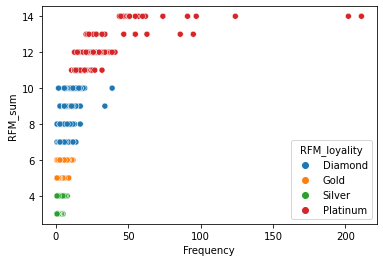

In [ ]:
sns.scatterplot(data=RFMScore,x="Frequency",y="RFM_sum",hue="RFM_loyality")

<AxesSubplot:xlabel='Monetary', ylabel='RFM_sum'>

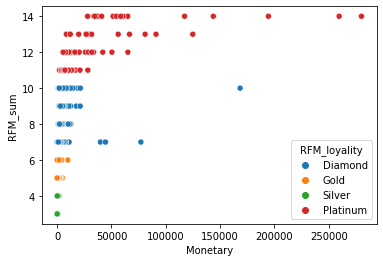

In [ ]:
sns.scatterplot(data=RFMScore,x="Monetary",y="RFM_sum",hue="RFM_loyality")

<AxesSubplot:xlabel='Recency', ylabel='RFM_sum'>

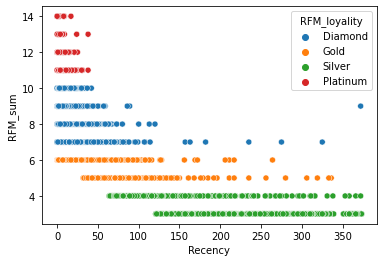

In [ ]:
sns.scatterplot(data=RFMScore,x="Recency",y="RFM_sum",hue="RFM_loyality")

## Creating RFM_id by combining R,F,M score instead of adding

In [ ]:
RFMScore["RFM_ID"]=RFMScore.R.map(str)+RFMScore.F.map(str)+RFMScore.M.map(str)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID
0,12346.0,325,1,77183.60,1,1,5,7,Diamond,115
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,423
2,12348.0,75,4,1797.24,2,1,2,5,Gold,212
3,12349.0,18,1,1757.55,4,1,2,7,Diamond,412
4,12350.0,310,1,334.40,1,1,1,3,Silver,111


## Customer Segment descriptions:
- **1. Inactive or Passerby customers** - Customers who are not after anything in particular. only buy what might catch their attention.
- **2. Promising or Loyal customers** - Customers who shop regularly and love this shopping mall
- **3. New customers** - Customers who enjoy their last visit to shop and may come back if they find out more about what this mall has to offer
- **4. Out-of-town customers or sleeping**  - They were once loyal customers, but they move to new place and find a closer shopping mall
- **5. Students** - Customers who visit the store often but they dont spend much
- **6. Can't loose or Dissatisfied customers** - They spend a lot on shopping, but the previous purchase didnt suit them
- **7. Nurture or Soon-to-be loyal customers** - They are 'soon-to-be' loyal customers if the previous purchase suited them and the mall catches their attention

**regex for customer segmentation from RFM ID**

In [ ]:
seg_map={
    r'[1][1-2][2-3]':"Inactive or Passerby customers ",
    r'[1-2][1-3][3]':"at-Risk",
    r'[1-2][1-5][3-5]':"cant_lose",
    r'[1][1-4][2-4]':"about_to_sleep",
    r'[3][3][3]':"need_attention",
    r'[3-5][3-5][3-5]':"promising",
    r'[1-2][1-5][1-2]':"new customer",
    r'[3-5][[1-5][1-2]':'students',
    r'[3-5][[1-3][1-2]':'Nurture',
    r'[3-5][[1-2][3-5]': 'Drive_Loyality',
    }

RFMScore["Segment"]=RFMScore["RFM_ID"].replace(seg_map,regex=True)
RFMScore['Segment'].value_counts()


students                           1709
new customer                       1654
Drive_Loyality                      515
promising                           228
Inactive or Passerby customers      144
at-Risk                              68
cant_lose                            19
need_attention                        2
Name: Segment, dtype: int64

In [ ]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID,Segment
0,12346.0,325,1,77183.60,1,1,5,7,Diamond,115,cant_lose
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,423,Drive_Loyality
2,12348.0,75,4,1797.24,2,1,2,5,Gold,212,new customer
3,12349.0,18,1,1757.55,4,1,2,7,Diamond,412,students
4,12350.0,310,1,334.40,1,1,1,3,Silver,111,new customer


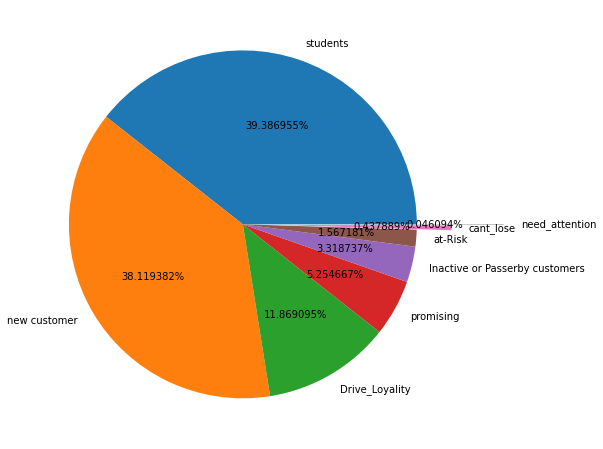

In [ ]:
plt.figure(figsize=(12,8))
plt.pie(RFMScore.Segment.value_counts(),explode=(0,0,0,0,0,0,0.2,0.5),labels=RFMScore.Segment.value_counts().index,autopct="%2f%%")
plt.show()


# KMEANS ALGORITHM

In [ ]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID,Segment
0,12346.0,325,1,77183.60,1,1,5,7,Diamond,115,cant_lose
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,423,Drive_Loyality
2,12348.0,75,4,1797.24,2,1,2,5,Gold,212,new customer
3,12349.0,18,1,1757.55,4,1,2,7,Diamond,412,students
4,12350.0,310,1,334.40,1,1,1,3,Silver,111,new customer


In [ ]:
Newdata=RFMScore["RFM_sum"]
Newdata
pd.DataFrame(Newdata)

,RFM_sum
0,7
1,9
2,5
3,7
4,3
...,...
4334,3
4335,3
4336,6
4337,10


### finding the appropriate cluster number by applying the k-means algorithm- Elbow Method

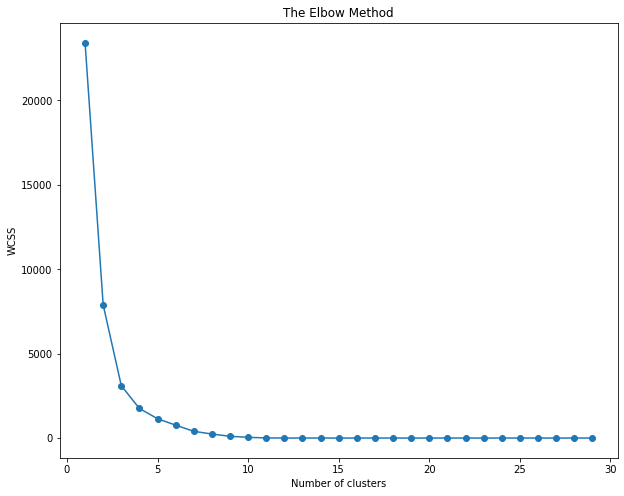

In [ ]:
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pd.DataFrame(Newdata))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss,marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

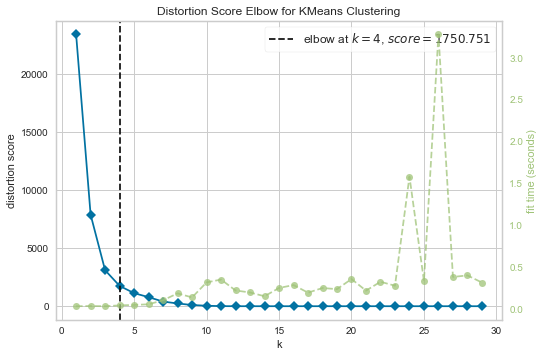

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# install yellowbrick package
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,30)).fit(pd.DataFrame(Newdata))
visualizer.show()

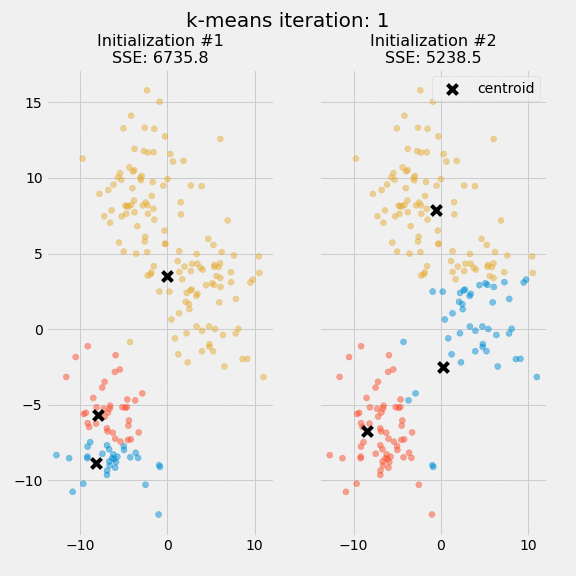

In [ ]:
# Fitting data using KMeans algorithm----K=4
kmeans=KMeans(n_clusters=4,init="k-means++",max_iter=100,random_state=101)
y_kmeans=kmeans.fit_predict(pd.DataFrame(Newdata))
y_kmeans

array([1, 1, 2, ..., 2, 3, 2])

In [ ]:
RFMScore["Cluster"]=kmeans.labels_
RFMScore.head(100)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID,Segment,Cluster
0,12346.0,325,1,77183.60,1,1,5,7,Diamond,115,cant_lose,1
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,423,Drive_Loyality,1
2,12348.0,75,4,1797.24,2,1,2,5,Gold,212,new customer,2
3,12349.0,18,1,1757.55,4,1,2,7,Diamond,412,students,1
4,12350.0,310,1,334.40,1,1,1,3,Silver,111,new customer,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,12462.0,18,2,1189.59,4,1,2,7,Diamond,412,students,1
96,12463.0,53,4,1344.78,3,1,2,6,Gold,312,students,2
97,12464.0,10,8,1212.05,4,2,2,8,Diamond,422,students,1
98,12465.0,17,2,742.19,4,1,1,6,Gold,411,students,2


In [ ]:
RFMScore["Cluster"].value_counts()

0    1613
2    1501
1     939
3     286
Name: Cluster, dtype: int64

In [ ]:
RFMScore["RFM_loyality"].value_counts()

Silver      1613
Gold        1501
Diamond     1056
Platinum     169
Name: RFM_loyality, dtype: int64

#### Evaluate the cluster

In [ ]:
labels=kmeans.labels_

from sklearn.metrics import silhouette_score

print(silhouette_score(pd.DataFrame(Newdata),labels))

0.6852503708339764


- we  find the very good silhoutte score so clustering is effective

## Goal 2 :Analysing the sales trend 

In [ ]:
# when is the sales highest (month/season/day/timing)
# when is the rush hour (month/season/day)
# when the rush as per timing (morning,afternoon,evening) as per day(weekday/weekend)
# Monthly sales trend

In [ ]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [ ]:
import datetime as dt
# Extration of day from invoicedate
df_final["Day"]=df_final["InvoiceDate"].dt.day_name()

In [ ]:
# Extration of MONTH from invoicedate
df_final["Month"]=df_final["InvoiceDate"].dt.month

In [ ]:
# Extration of HOUR from invoicedate
df_final["Hour"]=df_final["InvoiceDate"].dt.hour

In [ ]:
df_final.head(100)

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8
...,...,...,...,...,...,...,...
95,536569,2010-12-01 15:35:00,16274.0,357.95,Wednesday,12,15
96,536570,2010-12-01 15:35:00,14496.0,304.34,Wednesday,12,15
97,536571,2010-12-01 15:37:00,14696.0,294.62,Wednesday,12,15
98,536572,2010-12-01 15:40:00,16539.0,442.35,Wednesday,12,15


## Function to create season and timing column

In [ ]:
# Deriving season
def cal_season(x):
    if x in [11,12,1,2]:
        return 'Winter'
    elif x in [3,4,5]:
        return 'Summer'
    elif x in [6,7,8]:
        return 'Monsoon'
    else:
        return 'Post Monsoon'

In [ ]:
# Deriving timing
def cal_timing(x):
    if x in range(0,5):
        return 'Early Morning(0:00 - 4:00 Hours)'
    elif x in range(5,11):
        return 'Morning(5:00 - 11:00 Hours)'
    elif x in range(11,16):
        return 'Afternoon(11:00 - 17:00 Hours)'
    elif x in range(17,24):
        return 'Evening(17:00-20:00 Hours)'
    else :
        return 'Night(20:00-00:00 Hours)'

In [ ]:
df_final['season'] = df_final['Month'].apply(cal_season)

In [ ]:
df_final['Timing'] = df_final['Hour'].apply(cal_timing)

In [ ]:
df_final.head(100)

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,season,Timing
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,Winter,Morning(5:00 - 11:00 Hours)
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,Winter,Morning(5:00 - 11:00 Hours)
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,Winter,Morning(5:00 - 11:00 Hours)
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,Winter,Morning(5:00 - 11:00 Hours)
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,Winter,Morning(5:00 - 11:00 Hours)
...,...,...,...,...,...,...,...,...,...
95,536569,2010-12-01 15:35:00,16274.0,357.95,Wednesday,12,15,Winter,Afternoon(11:00 - 17:00 Hours)
96,536570,2010-12-01 15:35:00,14496.0,304.34,Wednesday,12,15,Winter,Afternoon(11:00 - 17:00 Hours)
97,536571,2010-12-01 15:37:00,14696.0,294.62,Wednesday,12,15,Winter,Afternoon(11:00 - 17:00 Hours)
98,536572,2010-12-01 15:40:00,16539.0,442.35,Wednesday,12,15,Winter,Afternoon(11:00 - 17:00 Hours)


In [ ]:
df_final['Month'] = df_final['InvoiceDate'].dt.month_name()

In [ ]:
df_final['weekend']=np.where((df_final['Day']=='Saturday')|(df_final['Day']=='Sunday'),'Yes',"No")

- **Final Dataset**

In [ ]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,season,Timing,weekend
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,December,8,Winter,Morning(5:00 - 11:00 Hours),No
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,December,8,Winter,Morning(5:00 - 11:00 Hours),No
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,December,8,Winter,Morning(5:00 - 11:00 Hours),No
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,December,8,Winter,Morning(5:00 - 11:00 Hours),No
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,December,8,Winter,Morning(5:00 - 11:00 Hours),No


## Analyzing rush hour i.e total number of invoice is more 

## Day

In [ ]:
day_count = df_final.groupby('Day')['InvoiceNo'].count().to_frame('count_of_invoices').reset_index()
day_count

,Day,count_of_invoices
0,Friday,2835
1,Monday,2865
2,Sunday,2177
3,Thursday,4038
4,Tuesday,3189
5,Wednesday,3462


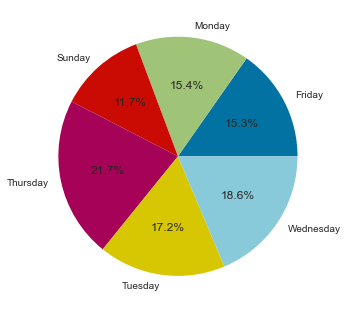

In [ ]:
plt.pie(day_count.count_of_invoices,labels=day_count['Day'],autopct='%.1f%%')
plt.show()

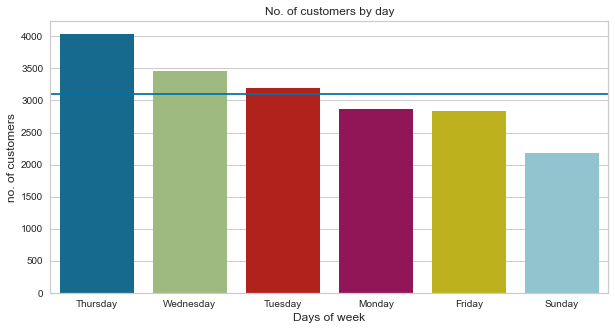

In [ ]:
# plot number of customers by day graph
day=df_final["Day"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(day.index,day.values)
#plot the average 
plt.axhline(y=day.mean())
plt.title("No. of customers by day")
plt.ylabel("no. of customers",fontsize=12)
plt.xlabel("Days of week",fontsize=12)
plt.show()

## Month

In [ ]:
month_count = df_final.groupby('Month')['InvoiceNo'].count().to_frame('count_of_invoices')

In [ ]:
month_count.reset_index(inplace=True)

In [ ]:
month_count

,Month,count_of_invoices
0,April,1153
1,August,1283
2,December,2179
3,February,1003
4,January,993
5,July,1331
6,June,1394
7,March,1324
8,May,1559
9,November,2660


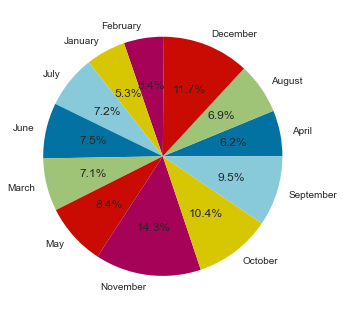

In [ ]:
plt.pie(month_count.count_of_invoices,labels=month_count['Month'],autopct='%.1f%%')
plt.show()

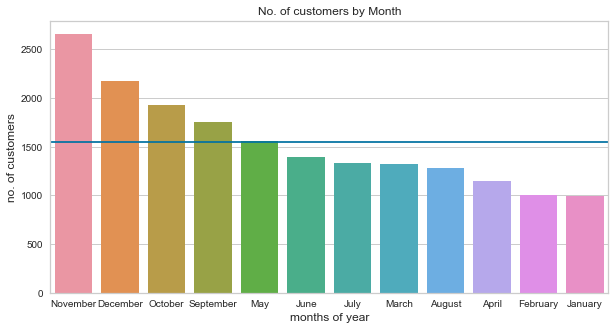

In [ ]:
# plot number of customers by month graph
Month=df_final["Month"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(Month.index,Month.values)
#plot the average 
plt.axhline(y=Month.mean())
plt.title("No. of customers by Month")
plt.ylabel("no. of customers",fontsize=12)
plt.xlabel("months of year",fontsize=12)
plt.show()

## Season

In [ ]:
season_count = df_final.groupby('season')['InvoiceNo'].count().to_frame('count_of_invoices')

In [ ]:
season_count.reset_index(inplace=True)

In [ ]:
season_count

,season,count_of_invoices
0,Monsoon,4008
1,Post Monsoon,3687
2,Summer,4036
3,Winter,6835


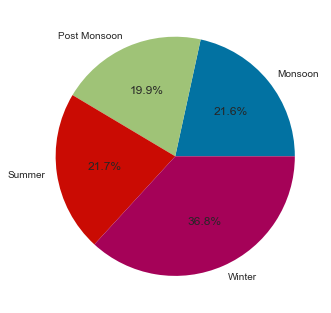

In [ ]:
plt.pie(season_count.count_of_invoices,labels=season_count['season'],autopct='%.1f%%')
plt.show()

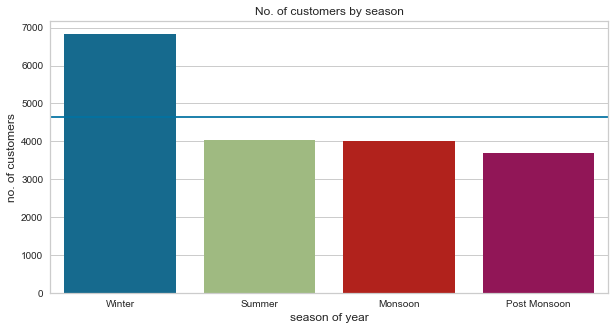

In [ ]:
# plot number of customers by season graph
season=df_final["season"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(season.index,season.values)
#plot the average 
plt.axhline(y=season.mean())
plt.title("No. of customers by season")
plt.ylabel("no. of customers",fontsize=12)
plt.xlabel("season of year",fontsize=12)
plt.show()

## Timing

In [ ]:
Time_count = df_final.groupby('Timing')['InvoiceNo'].count().to_frame('count_of_invoices')
Time_count.reset_index(inplace=True)

In [ ]:
Time_count

,Timing,count_of_invoices
0,Afternoon(11:00 - 17:00 Hours),12374
1,Evening(17:00-20:00 Hours),877
2,Morning(5:00 - 11:00 Hours),4210
3,Night(20:00-00:00 Hours),1105


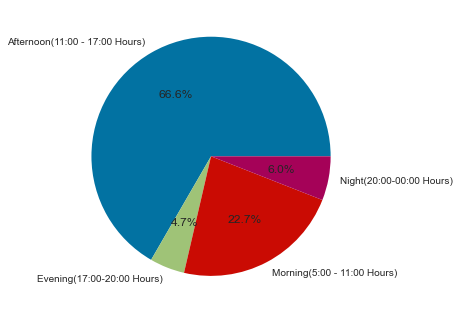

In [ ]:
plt.pie(Time_count.count_of_invoices,labels=Time_count['Timing'],autopct='%.1f%%')
plt.show()

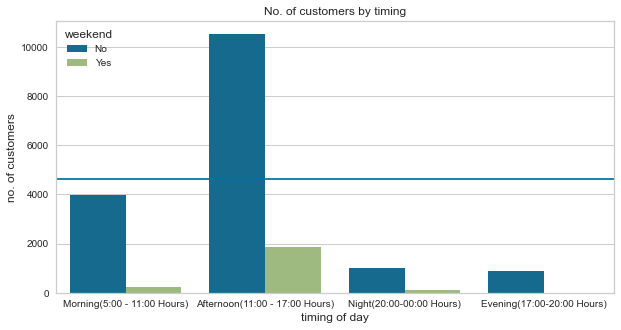

In [ ]:
# plot number of customers by timing-weekend graph
timing=df_final["Timing"].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(x=df_final['Timing'],hue=df_final['weekend'])
#plot the average customers
plt.axhline(y=timing.mean())
plt.title("No. of customers by timing")
plt.ylabel("no. of customers",fontsize=12)
plt.xlabel("timing of day",fontsize=12)
plt.show()

## Analyzing Total Sales

## Day

In [ ]:
day_sales = df_final.groupby('Day')['Total'].sum().to_frame('Total_sales').reset_index().sort_values(by = 'Total_sales', ascending = False)
day_sales

,Day,Total_sales
3,Thursday,1976859.070
4,Tuesday,1700634.631
5,Wednesday,1588336.170
0,Friday,1485917.401
1,Monday,1367146.411
2,Sunday,792514.221


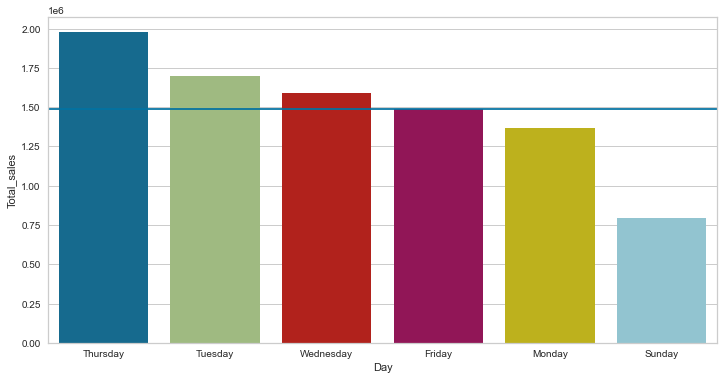

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=day_sales, x="Day", y="Total_sales")
#plot the average sale
plt.axhline(y=day_sales['Total_sales'].mean())

- Thers is no sale on saturday so we can conclude that Mall is closed on every Saturday

## Month

In [ ]:
month_sales = df_final.groupby('Month')['Total'].sum().to_frame('Total_sales').reset_index().sort_values(by = 'Total_sales', ascending = False)
month_sales

,Month,Total_sales
9,November,1161817.380
2,December,1090906.680
10,October,1039318.790
11,September,952838.382
8,May,678594.560
6,June,661213.690
1,August,645343.900
5,July,600091.011
7,March,595500.760
4,January,569445.040


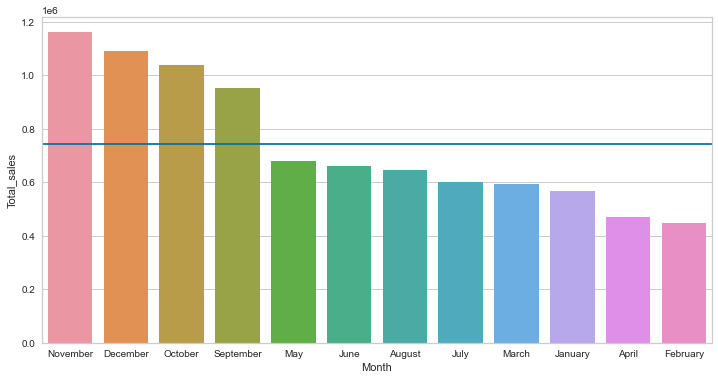

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=month_sales, x="Month", y="Total_sales")
#plot the average sale
plt.axhline(y=month_sales['Total_sales'].mean())

## Season

In [ ]:
season_sales = df_final.groupby('season')['Total'].sum().to_frame('Total_sales').reset_index().sort_values(by = 'Total_sales', ascending = False)
season_sales

,season,Total_sales
3,Winter,3269306.450
1,Post Monsoon,1992157.172
0,Monsoon,1906648.601
2,Summer,1743295.681


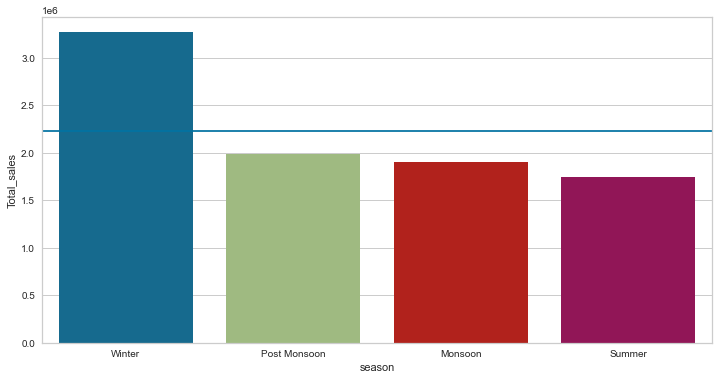

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=season_sales, x="season", y="Total_sales")
#plot the average sale
plt.axhline(y=season_sales['Total_sales'].mean())

## Timing

In [ ]:
Timing_sales = df_final.groupby('Timing')['Total'].sum().to_frame('Total_sales').reset_index().sort_values(by = 'Total_sales', ascending = False)
Timing_sales

,Timing,Total_sales
0,Afternoon(11:00 - 17:00 Hours),5618216.101
2,Morning(5:00 - 11:00 Hours),2416976.832
3,Night(20:00-00:00 Hours),468885.800
1,Evening(17:00-20:00 Hours),407329.171


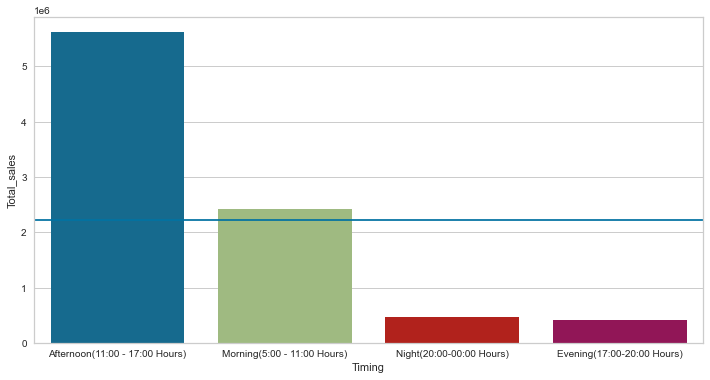

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=Timing_sales, x="Timing", y="Total_sales")
#plot the average sale
plt.axhline(y=Timing_sales['Total_sales'].mean())

## Sales Trend

<AxesSubplot:xlabel='Month_Year'>

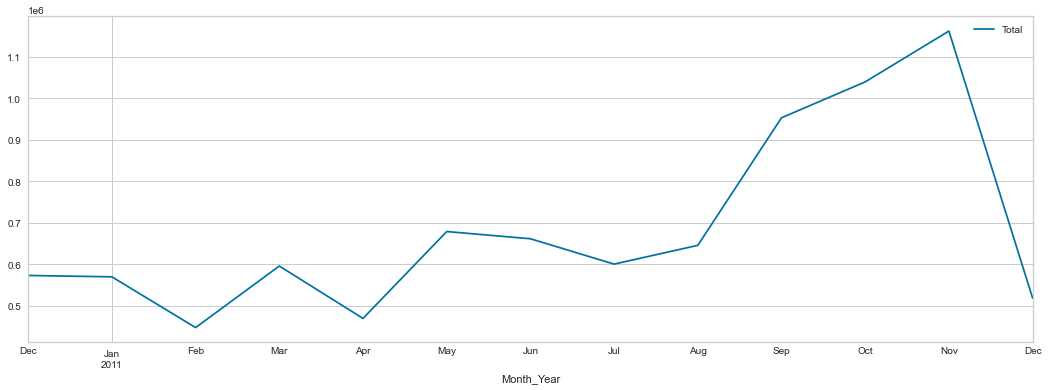

In [ ]:
df_final['Month_Year'] = df_final['InvoiceDate'].dt.to_period('M')
sales = df_final.groupby(['Month_Year']).sum()
sales[['Total']].plot(figsize=(18, 6))

- 1.Sales is in increasing trend
- 2.Winter season mainly November and December Sales is high...It can be due to Festival Season mostly or Sales is increasing month on month also
- 3.Thursday Sales is high than other day ...Sunday is low sale and saturday no sale so Saturday is mall close may be and sunday its open for shorter period of time beacuse Sunday Evening there is no sale as well


# Goal 3: Top 10 Selling Product

In [ ]:
# Goal 4 , give high weightage to Monetary only @ 10( for example) and make a customer segregation

In [ ]:
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df_top=df.copy()
df_top=df_top.drop(['lower','CustomerID'],axis=1)


In [ ]:
# Finding the Total Sale by multiplying the Quantity and Unit Price
df_top['Total']=df_top['Quantity']*df_top['UnitPrice']
df_top.drop(['UnitPrice'],axis=1,inplace=True)
df_top.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,United Kingdom,20.34


### Finding the Overal Sale of a Product using Pivot Table

In [ ]:
df_top_table=df_top.pivot_table(values='Total',index=['Description'],aggfunc='sum',sort=True).reset_index()

In [ ]:
df_top_table.head()

,Description,Total
0,20713,0.00
1,4 PURPLE FLOCK DINNER CANDLES,290.80
2,50'S CHRISTMAS GIFT BAG LARGE,2341.13
3,DOLLY GIRL BEAKER,2882.50
4,I LOVE LONDON MINI BACKPACK,1628.17


**Extracting top 10 rows by sorting the 'Total' column in descending order**

In [ ]:
df_top_table.sort_values(by='Total',ascending=False).head(10)

,Description,Total
1098,DOTCOM POSTAGE,206245.48
2915,REGENCY CAKESTAND 3 TIER,164762.19
3918,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
2471,PARTY BUNTING,98302.98
1866,JUMBO BAG RED RETROSPOT,92356.03
2803,RABBIT NIGHT LIGHT,66756.59
2753,POSTAGE,66230.64
2439,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
244,ASSORTED COLOUR BIRD ORNAMENT,58959.73
773,CHILLI LIGHTS,53768.06


### Or we can use groupby function also

In [ ]:
df_top.groupby('Description').sum().reset_index().sort_values(by='Total',ascending=False).head(10)

,Description,Quantity,Total
1098,DOTCOM POSTAGE,707,206245.48
2915,REGENCY CAKESTAND 3 TIER,13033,164762.19
3918,WHITE HANGING HEART T-LIGHT HOLDER,35317,99668.47
2471,PARTY BUNTING,18022,98302.98
1866,JUMBO BAG RED RETROSPOT,47363,92356.03
2803,RABBIT NIGHT LIGHT,30680,66756.59
2753,POSTAGE,3003,66230.64
2439,PAPER CHAIN KIT 50'S CHRISTMAS,18902,63791.94
244,ASSORTED COLOUR BIRD ORNAMENT,36381,58959.73
773,CHILLI LIGHTS,10229,53768.06


In [ ]:
df_top.groupby('Description').sum().reset_index().sort_values(by='Quantity',ascending=False).head(10)

,Description,Quantity,Total
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,13587.93
1866,JUMBO BAG RED RETROSPOT,47363,92356.03
244,ASSORTED COLOUR BIRD ORNAMENT,36381,58959.73
2740,POPCORN HOLDER,36334,33969.46
2395,PACK OF 72 RETROSPOT CAKE CASES,36039,21059.72
3918,WHITE HANGING HEART T-LIGHT HOLDER,35317,99668.47
2803,RABBIT NIGHT LIGHT,30680,66756.59
2161,MINI PAINT SET VINTAGE,26437,16810.42
2361,PACK OF 12 LONDON TISSUES,26315,7972.76
2393,PACK OF 60 PINK PAISLEY CAKE CASES,24753,12189.47


In [ ]:
df_top.groupby('Description').sum().reset_index().sort_values(by='Quantity').head(10)

,Description,Quantity,Total
4167,printing smudges/thrown away,-19200,0.0
3740,"Unsaleable, destroyed.",-15644,0.0
4116,check,-12030,0.0
2796,Printing smudges/thrown away,-9058,0.0
1123,Damaged,-7540,0.0
4194,throw away,-5368,0.0
4126,damages,-4338,0.0
4147,incorrect stock entry.,-4320,0.0
4195,thrown away,-4110,0.0
4219,wrongly marked. 23343 in box,-3100,0.0


- Most Selling product in the mall is **'DotCom Postage'** as per Total Sale amount
- As per qty ,**'WORLD WAR 2 GLIDERS ASSTD DESIGNS'** is most sale product
- Most returned product is **'printing smudges/thrown away'**

## Best product at a country level

In [ ]:
df4=df_top.pivot_table(values='Total',index=['Country','Description'],aggfunc='sum',sort=False).reset_index()

In [ ]:
df4.head()

,Country,Description,Total
0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,93953.07
1,United Kingdom,WHITE METAL LANTERN,7684.25
2,United Kingdom,CREAM CUPID HEARTS COAT HANGER,5379.17
3,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,15779.79
4,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,21013.43


In [ ]:
# Post identifying the sales of each product at a country level. Picking the highest sale value by grouping
df_Cntry=df4.groupby(by='Country').max()
df_Cntry=df_Cntry.reset_index()
df_Cntry.head()

,Country,Total
0,Australia,3375.84
1,Austria,1456.00
2,Bahrain,120.00
3,Belgium,4248.00
4,Brazil,175.20


In [ ]:
# Created the Primary key
df_Cntry['Primary']=df_Cntry['Country']+' '+(df_Cntry['Total'].map(str))  
df_Cntry.head(10)

,Country,Total,Primary
0,Australia,3375.84,Australia 3375.84
1,Austria,1456.00,Austria 1456.0
2,Bahrain,120.00,Bahrain 120.0
3,Belgium,4248.00,Belgium 4248.0
4,Brazil,175.20,Brazil 175.2
5,Canada,550.94,Canada 550.94
6,Channel Islands,517.80,Channel Islands 517.8
7,Cyprus,580.00,Cyprus 580.0
8,Czech Republic,70.80,Czech Republic 70.80000000000001
9,Denmark,734.40,Denmark 734.4000000000001


In [ ]:
## Creating a Primary key by merging two columns for the initial table
df4['Primary']=df4['Country']+' '+(df4['Total'].map(str))
df4.head()

,Country,Description,Total,Primary
0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,93953.07,United Kingdom 93953.07
1,United Kingdom,WHITE METAL LANTERN,7684.25,United Kingdom 7684.25
2,United Kingdom,CREAM CUPID HEARTS COAT HANGER,5379.17,United Kingdom 5379.17
3,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,15779.79,United Kingdom 15779.79
4,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,21013.43,United Kingdom 21013.43


In [ ]:
# After extracting the max sale value at a country level to identify the Prodcut name on basis of the Sale and Country Value
# Merged these two tables using left join
df_mrg=df_Cntry.merge(df4,how='left',on='Primary')
df_mrg.head()

,Country_x,Total_x,Primary,Country_y,Description,Total_y
0,Australia,3375.84,Australia 3375.84,Australia,RABBIT NIGHT LIGHT,3375.84
1,Austria,1456.00,Austria 1456.0,Austria,POSTAGE,1456.00
2,Bahrain,120.00,Bahrain 120.0,Bahrain,ICE CREAM SUNDAE LIP GLOSS,120.00
3,Belgium,4248.00,Belgium 4248.0,Belgium,POSTAGE,4248.00
4,Brazil,175.20,Brazil 175.2,Brazil,REGENCY CAKESTAND 3 TIER,175.20


In [ ]:
# Change the Column Names to extract the final table showcasing the best product at country level
df_Cntry_prd=df_mrg[['Country_x','Description','Total_x']]
df_Cntry_prd.rename(columns={'Country_x':'Country'},inplace=True)
df_Cntry_prd.rename(columns={'Total_x':'Total_Sales'},inplace=True)

In [ ]:
df_Cntry_prd

,Country,Description,Total_Sales
0,Australia,RABBIT NIGHT LIGHT,3375.84
1,Austria,POSTAGE,1456.00
2,Bahrain,ICE CREAM SUNDAE LIP GLOSS,120.00
3,Belgium,POSTAGE,4248.00
4,Brazil,REGENCY CAKESTAND 3 TIER,175.20
5,Canada,POSTAGE,550.94
6,Channel Islands,REGENCY CAKESTAND 3 TIER,517.80
7,Cyprus,RUSTIC SEVENTEEN DRAWER SIDEBOARD,580.00
8,Czech Republic,ROUND SNACK BOXES SET OF4 WOODLAND,70.80
9,Denmark,RED KITCHEN SCALES,734.40


## Top 10 Country with maxm sale

<AxesSubplot:xlabel='Country', ylabel='Sum_of_Sales'>

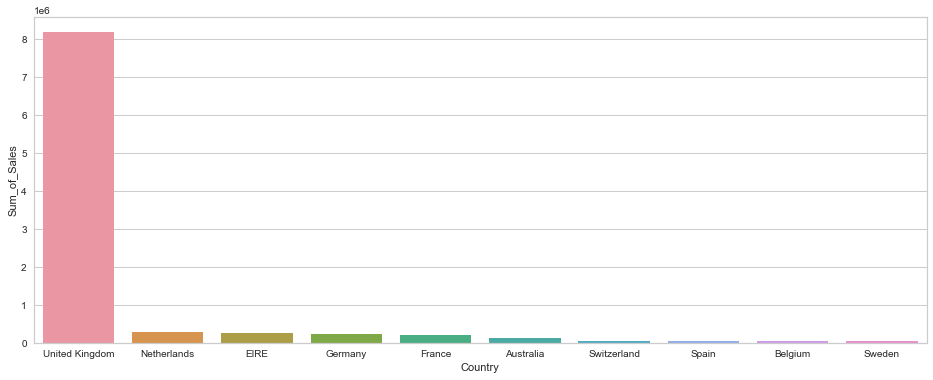

In [ ]:
Cn_sale= df4.groupby(['Country']).agg(Sum_of_Sales=('Total','sum')).reset_index().sort_values(by = 'Sum_of_Sales', ascending = False)


fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=Cn_sale.head(10), x="Country", y="Sum_of_Sales")

- **UK** has very large sale comapre to other countries and **'DOTCOM POSTAGE'** is most sale product in UK

In [ ]:
# customer valuation 
# We can thing the problem statement as a regression problem

In [ ]:
"""
Customer Life time value(CLTV) is a quantitative analysis and 
one of the most important metric to modern customer centric business senario.
It has been a mainstay concept in direct response marketing for many years , 
and has been increasingly considered in the field of marketing.
"""

In [ ]:
#Customer life time value(CLTV)**
"""Customer Lifetime Value is the amount of monetary value a customer
will bring to your company during their lifetime, from the first 
to the last purchase. In other words, it is a number that represents 
the total amount spent by a single customer on your products 
or services over their lifespan.

Based on that specific number, you will have a better sense of how much 
you can spend on customer acquisition, how much you should invest into 
your existing customers, and you can define strategies and a budget 
to increase your Customer Lifetime Value in eCommerce or retain your 
high-value customers.
"""


In [ ]:
# CLTV using formula

In [ ]:
df100=df1.copy()
df100.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [ ]:
RFMScore.shape[0]

4339

In [ ]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID,Segment,Cluster
0,12346.0,325,1,77183.60,1,1,5,7,Diamond,115,cant_lose,1
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,423,Drive_Loyality,1
2,12348.0,75,4,1797.24,2,1,2,5,Gold,212,new customer,2
3,12349.0,18,1,1757.55,4,1,2,7,Diamond,412,students,1
4,12350.0,310,1,334.40,1,1,1,3,Silver,111,new customer,0


In [ ]:
# AVERAGE ORDER VALUE
df100["avg_order_value"]=RFMScore["Monetary"]/RFMScore["Frequency"]

In [ ]:
df100.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total,avg_order_value
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30,77183.600000
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,615.714286
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00,449.310000
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,1757.550000
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,334.400000


In [ ]:
sum(RFMScore["Frequency"])

18566

In [ ]:
#Purchase Frquency
purchase_frequency=sum(RFMScore["Frequency"])/RFMScore.shape[0]

RFMScore[RFMScore["Frequency"]>1]

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_sum,RFM_loyality,RFM_ID,Segment,Cluster
1,12347.0,2,7,4310.00,4,2,3,9,Diamond,423,Drive_Loyality,1
2,12348.0,75,4,1797.24,2,1,2,5,Gold,212,new customer,2
5,12352.0,36,8,2506.04,3,2,3,8,Diamond,323,Drive_Loyality,1
9,12356.0,22,3,2811.43,4,1,3,8,Diamond,413,Drive_Loyality,1
11,12358.0,1,2,1168.06,4,1,2,7,Diamond,412,students,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4328,18272.0,2,6,3078.58,4,2,3,9,Diamond,423,Drive_Loyality,1
4329,18273.0,2,3,204.00,4,1,1,6,Gold,411,students,2
4336,18282.0,7,2,178.05,4,1,1,6,Gold,411,students,2
4337,18283.0,3,16,2094.88,4,3,3,10,Diamond,433,promising,3


In [ ]:
"""
RFMScore[RFMScore["Frequency"]>1]/RFMScore.shape[0]
RFMScore[RFMScore["Frequency"]>1].shape[0]
RFMScore.shape[0]
"""

In [ ]:

#Repeat Rate
repeat_rate=RFMScore[RFMScore["Frequency"]>1].shape[0]/RFMScore.shape[0]



In [ ]:
repeat_rate

0.6561419681954367

In [ ]:
#ChurnRate
churn_rate=1-repeat_rate


In [ ]:
purchase_frequency,repeat_rate,churn_rate

(4.278866098179304, 0.6561419681954367, 0.3438580318045633)

In [ ]:
# profit margin & CLTV
# Lets assume that business making 25% profit


In [ ]:
#profit Margin
df100["profit_margin"]=RFMScore["Monetary"]*0.25


In [ ]:
#customer value
df100["CLTV"]=df100["avg_order_value"]*purchase_frequency/churn_rate


In [ ]:
df100.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total,avg_order_value,profit_margin,CLTV
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30,77183.600000,19295.9000,960449.542627
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,615.714286,1077.5000,7661.763692
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00,449.310000,449.3100,5591.078727
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,1757.550000,439.3875,21870.424464
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,334.400000,83.6000,4161.173190


In [ ]:
# CUSTOMER LIFETIME VALUE
df100["cust_lifetime_value"]=df100["CLTV"]*df100["profit_margin"]

In [ ]:
df100.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total,avg_order_value,profit_margin,CLTV,cust_lifetime_value
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30,77183.600000,19295.9000,960449.542627,1.853274e+10
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,615.714286,1077.5000,7661.763692,8.255550e+06
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00,449.310000,449.3100,5591.078727,2.512128e+06
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,1757.550000,439.3875,21870.424464,9.609591e+06
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,334.400000,83.6000,4161.173190,3.478741e+05


In [ ]:
# creation of month year
df100["month_yr"]=df100["InvoiceDate"].apply(lambda x: x.strftime("%b-%Y"))# extract the month and year

df100.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total,avg_order_value,profit_margin,CLTV,cust_lifetime_value,month_yr
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30,77183.600000,19295.9000,960449.542627,1.853274e+10,Dec-2010
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,615.714286,1077.5000,7661.763692,8.255550e+06,Dec-2010
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00,449.310000,449.3100,5591.078727,2.512128e+06,Dec-2010
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,1757.550000,439.3875,21870.424464,9.609591e+06,Dec-2010
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34,334.400000,83.6000,4161.173190,3.478741e+05,Dec-2010


In [ ]:

"""
creating a pivot table taking the columns as input and groups the entries 
into two dimentsional table in sucf a way that provides a multidimentsional 
summation of the data.
"""
sale=df100.pivot_table(index=["CustomerID"],columns=["month_yr"],values="Total",aggfunc="sum",fill_value=0).reset_index()

In [ ]:
sale.head(100)




month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.0,0.00,0.0,0.00,0.00,0.00,0.0,77183.60
1,12347.0,636.25,584.91,711.79,224.82,0.00,475.39,0.0,382.52,0.0,0.00,0.00,1294.32,0.0,3673.75
2,12348.0,367.00,0.00,892.80,0.00,0.00,227.44,0.0,0.00,0.0,0.00,0.00,0.00,310.0,1430.24
3,12349.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,1757.55,0.00,0.0,1757.55
4,12350.0,0.00,0.00,0.00,0.00,334.40,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,334.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12462.0,0.00,0.00,0.00,0.00,762.11,0.00,0.0,0.00,0.0,0.00,427.48,0.00,0.0,1189.59
96,12463.0,350.57,0.00,0.00,0.00,0.00,0.00,0.0,337.84,0.0,297.38,0.00,358.99,0.0,994.21
97,12464.0,0.00,190.10,0.00,0.00,363.85,0.00,45.6,0.00,0.0,181.00,431.50,0.00,0.0,1212.05
98,12465.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,440.94,0.0,0.00,301.25,0.00,0.0,742.19


In [ ]:
sale["CLV"]=sale.iloc[:,2:].sum(axis=1)# sum all the months sale


In [ ]:
sale.head(100)

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.0,0.00,0.0,0.00,0.00,0.00,0.0,77183.60
1,12347.0,636.25,584.91,711.79,224.82,0.00,475.39,0.0,382.52,0.0,0.00,0.00,1294.32,0.0,3673.75
2,12348.0,367.00,0.00,892.80,0.00,0.00,227.44,0.0,0.00,0.0,0.00,0.00,0.00,310.0,1430.24
3,12349.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,1757.55,0.00,0.0,1757.55
4,12350.0,0.00,0.00,0.00,0.00,334.40,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,334.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12462.0,0.00,0.00,0.00,0.00,762.11,0.00,0.0,0.00,0.0,0.00,427.48,0.00,0.0,1189.59
96,12463.0,350.57,0.00,0.00,0.00,0.00,0.00,0.0,337.84,0.0,297.38,0.00,358.99,0.0,994.21
97,12464.0,0.00,190.10,0.00,0.00,363.85,0.00,45.6,0.00,0.0,181.00,431.50,0.00,0.0,1212.05
98,12465.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,440.94,0.0,0.00,301.25,0.00,0.0,742.19


In [ ]:
"""
now lets build a regression model for existing customers.
we need a set of dependent (Y) and independent variables (X)So, 
we shall take last six-month data as independent variables and 
total revenue over three years as a dependent variable.
"""
X=sale[["Sep-2011","Aug-2011","Jul-2011","Dec-2011","Nov-2011","Oct-2011"]]
Y=sale["CLV"]

In [ ]:
#SPLIT TRAINING AND TESTING
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

Y_pred=lr.predict(X_test)


print(lr.intercept_)
print(lr.coef_)

135.08008511589355
[1.4573906  2.42537157 2.09241612 1.01034406 0.87823132 2.02297766]


In [ ]:
from sklearn import metrics

print("R-Square", metrics.r2_score(Y_test,Y_pred))
print("MAE",metrics.mean_absolute_error(Y_test,Y_pred))
print("MSE",metrics.mean_squared_error(Y_test,Y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

R-Square 0.9835776185757205
MAE 585.4735194326988
MSE 1388109.2232573566
RMSE 1178.1804714292953


In [ ]:
"""
when the model is deployed the ML algorithm helps to understand the patterns;
it will also categorize the customers according to their CLTV predictions.
The Marketing strategy is important here considering that CLTV can figure out 
most profitable cutomers, but how we are going to make profit from them, 
will depend on the adopted marketing strategy. Moreover the loyalty programs
can be formulated based on the insights

"""


"""
Limitations:-
It is not clear how a regression model can be used to forecast 
the dynamics of buyer behavior well into the future and then tie 
it all back into the present value for each customer.


"""